In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_1 = mpimg.imread("./4.png")
img_2 = mpimg.imread("./6.png")

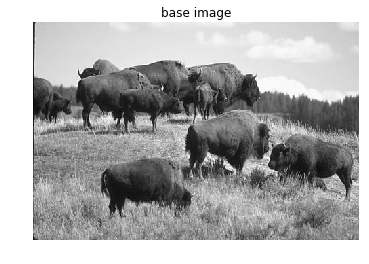

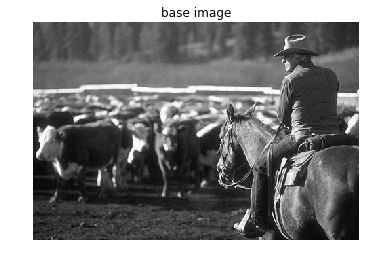

In [2]:
plt.imshow(img_1, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title("base image")
plt.show()
plt.imshow(img_2, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title("base image")
plt.show()

In [6]:
size = img_1.shape
dim_x, dim_y = img_1.shape
print(dim_x)
print(dim_y)

321
481


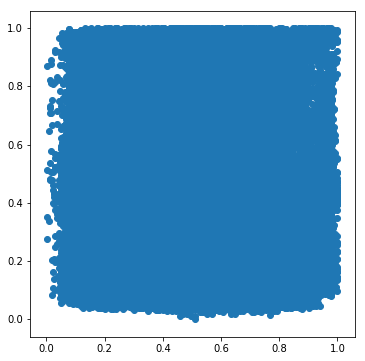

In [7]:
image_data_1=np.reshape(img_1, dim_x*dim_y)
image_data_2=np.reshape(img_2, dim_x*dim_y)

S=np.vstack((image_data_1,image_data_2)).T
plt.figure(figsize=(6, 6))
plt.axes().set_aspect('equal')
plt.scatter(S[:, 0], S[:, 1])

plt.show()

In [8]:
S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1], [0.5, 2]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

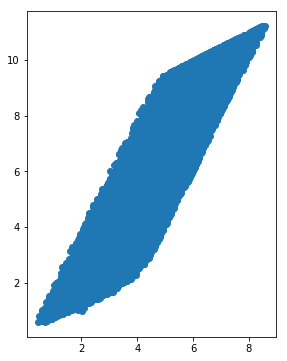

In [9]:
plt.figure(figsize=(6, 6))
plt.axes().set_aspect('equal')
plt.scatter(X[:, 0], X[:, 1])

plt.show()

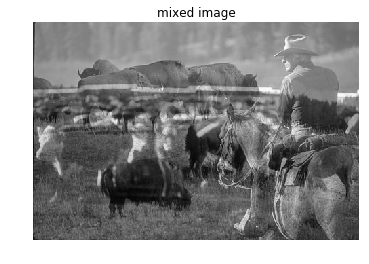

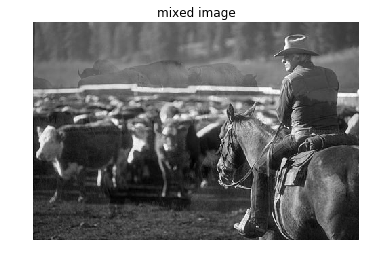

In [10]:
plt.imshow( X[:, 0].reshape(size), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title("mixed image")
plt.show()
plt.imshow( X[:, 1].reshape(size), cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.title("mixed image")
plt.show()

In [11]:
from sklearn.decomposition import FastICA
# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:301: UserWarning: n_components is too large: it will be set to 2
  warnings.warn('n_components is too large: it will be set to %s' % n_components)


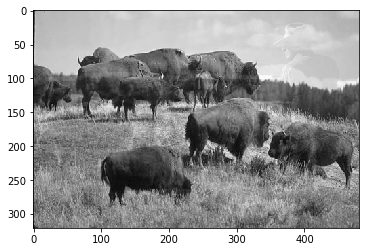

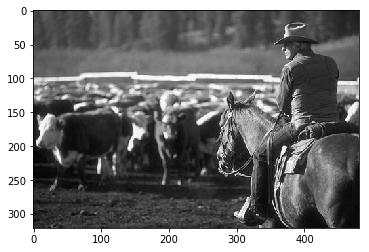

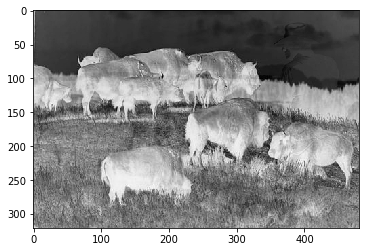

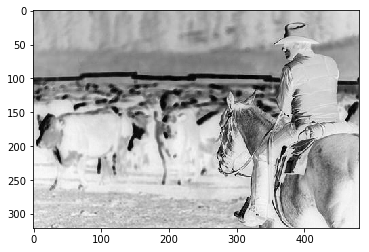

In [12]:
plt.imshow(((S_[:, 0].reshape(size))), cmap=plt.get_cmap('gray'))
plt.show()
plt.imshow(((S_[:, 1].reshape(size))), cmap=plt.get_cmap('gray'))
plt.show()
plt.imshow(-((S_[:, 0].reshape(size))), cmap=plt.get_cmap('gray'))
plt.show()
plt.imshow(-((S_[:, 1].reshape(size))), cmap=plt.get_cmap('gray'))
plt.show()